# Lab 06 - PAM Receiver with Matched Filter and Symbol Timing Extraction

### Maurice Woods

### 14 March 2017


------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------
## EC 01 - LPF with Trapezoidal Frequency Response

In [1]:
from pylab import *
import ecen4652 as ecen
import quick
import filtfun
import filtspecs
import showfun

##### Part A)

Make a Python module called "filtfun" and start the module with a function called "trapfilt()". This fucuntion should generate a truncated version hT(t) of the impulse response given above and use it to filter an input signal x(t) and produce a delay-compensated output signal y(t).

##### Part B)

To test trapfilt, let Fs=16000 Hz, use a time axis from -0.5 to 0.5 sec, and generate a unit impulse at t = 0.

> The trapezoidal filter produced by the following code is consistent with the figures in the Lab introduction. The signal is appropriately delay compensated, as the phase of the signal is 0 between $-f_L$ and $f_L$

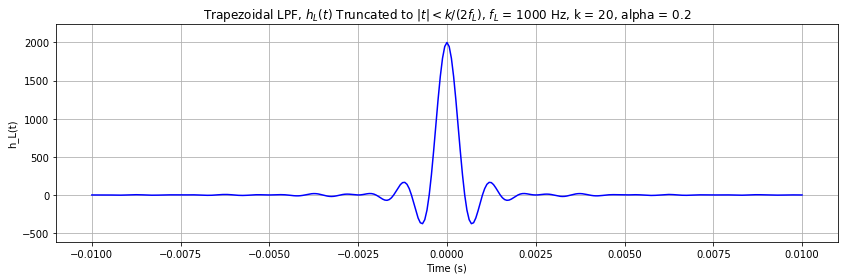

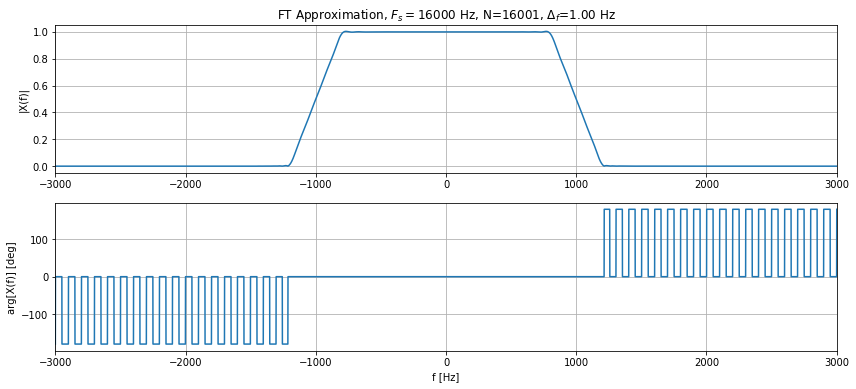

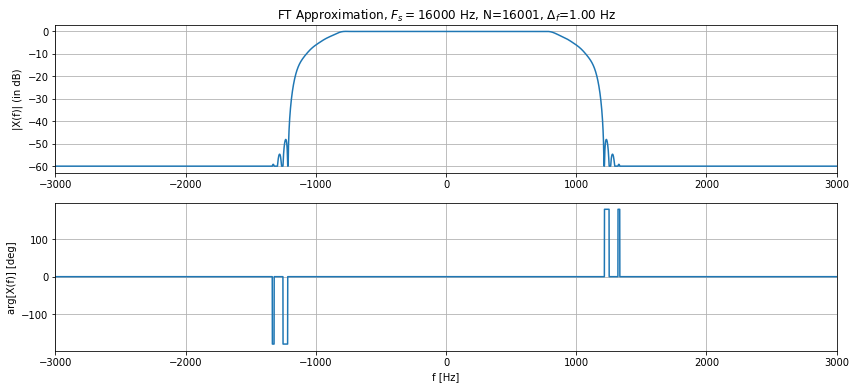

In [33]:
Fs=16000
t0=-0.5
t=1
xt=concatenate([zeros(int(Fs/2)),[1],zeros(Fs-int(Fs/2))])

sig_xt=ecen.sigWave(xt, Fs, t0)
fL=1000
k=20
alfa=0.2

[trap_xt,n]=filtfun.trapfilt0(sig_xt,fL,k,alfa)

showfun.showft(trap_xt,[-3000,3000,0])
showfun.showft(trap_xt,[-3000,3000,-60])

##### Part C)

Look at the PSD of this signal and then use trapfilt to lowpass filter the signal with fL ≈ 1000 Hz, k ≈ 10, and α ≈ 0.2. Determine the baud rate FB (look at the PSD of the lowpass filtered signal squared), and then use this information to display the eye diagram (use a width of 3TB and superimpose about 100 traces) of the lowpass filtered PAM signal. Change fL to find the value that gives you the largest eye opening. How is this fL related to FB?

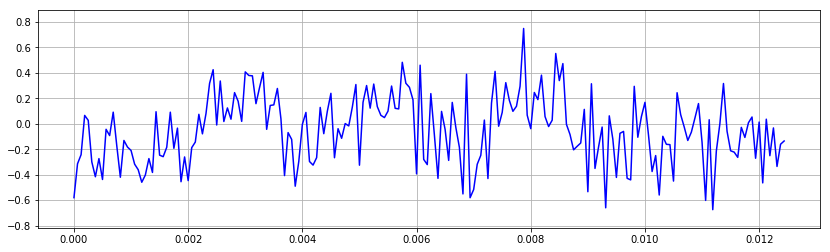

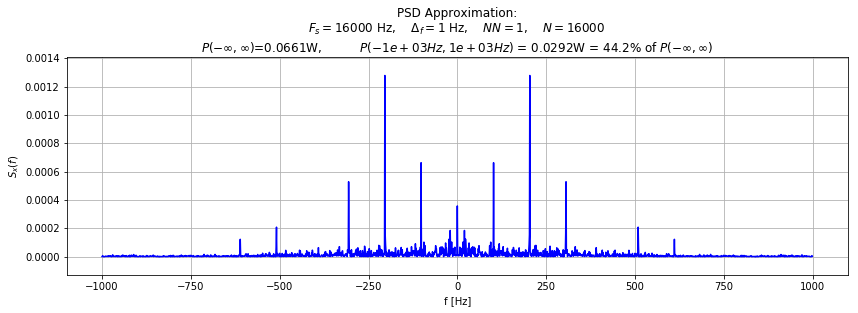

In [3]:
import wavfun
[seq, framerate] = wavfun.wavread("pamsig601.wav")
tt=quick.quicktt(seq,framerate)
quick.quickplot(tt[0:200],seq[0:200])

sig_xt = ecen.sigWave(seq, framerate)
showfun.showpsd1(sig_xt,[-1000, 1000, 0],framerate) #Plot S_x(f)

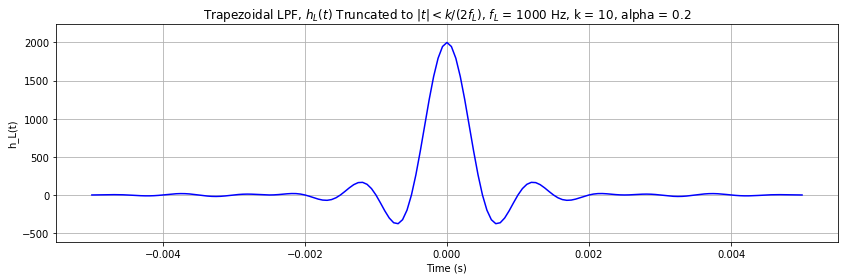

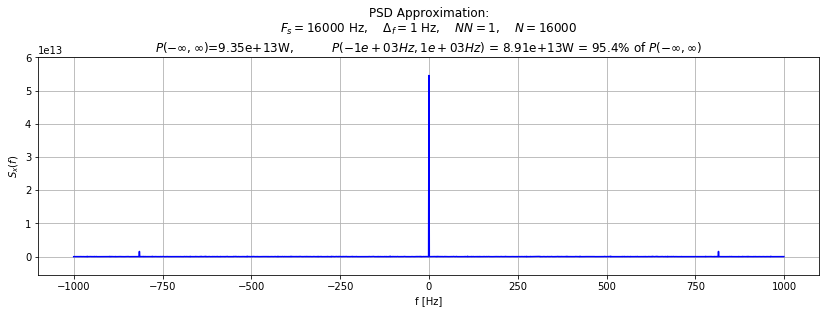

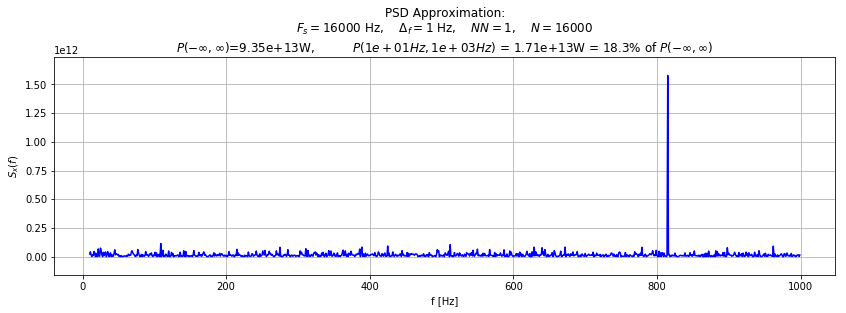

In [4]:
fL=1000
k=10
alfa=0.2
[trap_xt,n]=filtfun.trapfilt0(sig_xt,fL,k,alfa)
trap_xt_sqrd = trap_xt.copy()

trap_xt_sqrd.sig = trap_xt_sqrd.sig**2
showfun.showpsd1(trap_xt_sqrd,[-1000, 1000, 0],framerate) #Plot S_x(f)
showfun.showpsd1(trap_xt_sqrd,[10, 1000, 0],framerate) #Plot S_x(f)

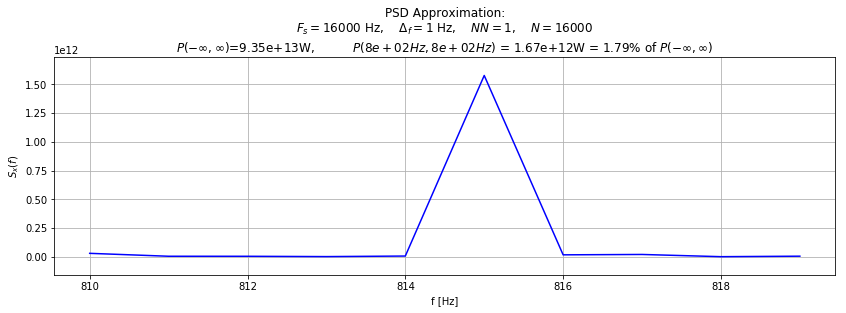

In [5]:
showfun.showpsd1(trap_xt_sqrd,[810, 820, 0],framerate) #Plot S_x(f)

> The baud rate, FB, is 815bps

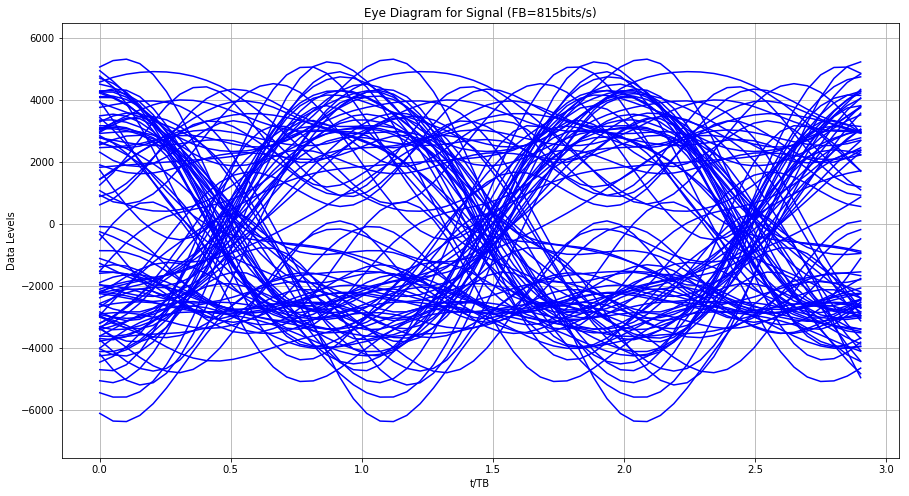

In [6]:
NTd=100
L=2
dly=0.5
FB=815
showfun.showeye(trap_xt, FB, NTd, [dly, 3, -1.5*L, 1.5*L])

> $f_L$ must be greater than the proper FB in order to not filter out the actual signal

##### Part D)

Start a new Python module filtspecs.py with a function called _trapfilt_taps_ that computes the taps for a FIR LPF with trapezoidal frequency response. Place the filtspecs.py module in one of the directories in your PYTHONPATH and generate a GNU Radio flowgraph that can be used to test the _trapfilt_ taps in a decimating or interpolating FIR filter block. Describe your measurement procedure and how the results that you measured verify the correct implementation of the LPF with a trapezoidal frequency response in GNU Radio.

> ![1D](1d.png)
>
> The following figures show the implamentation of the trapfilt taps in GNU radio using the previous flow graph. 
>
> ![1D.1](1d_1.png)
>
> ![1D.2](1d_2.png)
>
> ![1D.3](1d_3.png)
>
> These figures show that the signal is attenuated between the frequencies $(1-alpha)fL <= |f| <= (1+alpha)fL$ linearly, as illustrated by the linear sides of the trapezoidal filter. The first figure shows that an $alpha=0.5$ results in a output signal that is scaled by 1 for cutoff frequencies greater than $2*f_{input wave}$, is scaled by 0.5 at $f_L=f_{input wave}$, and is fully squelched beyond $f_{input wave}/2$

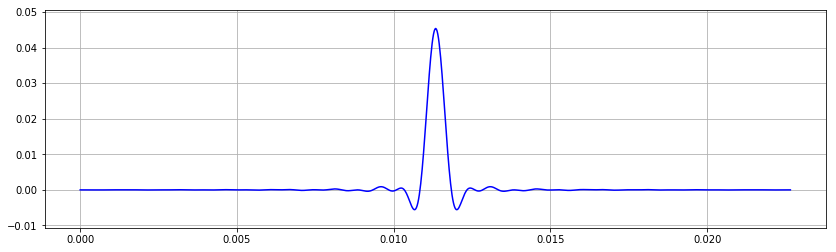

In [7]:
import filtspecs
import quick
hLn=filtspecs.trapfilt_taps(1000,1000/44100.0,0.4)

tt=quick.quicktt(hLn,44100)
quick.quickplot(tt,hLn)

> The filter tap produced by $trapfilt\_taps()$ is shown above

## EC 02 - PAM Transmitter/Receiver

In [8]:
from pylab import *
import ecen4652 as ecen
import quick
from ascfun import asc2bin
import pamfun
import showfun
import filtfun

##### Part A)

Update your pam11 function to include the RRCf (root raised cosine in frequency) pulse called pam12

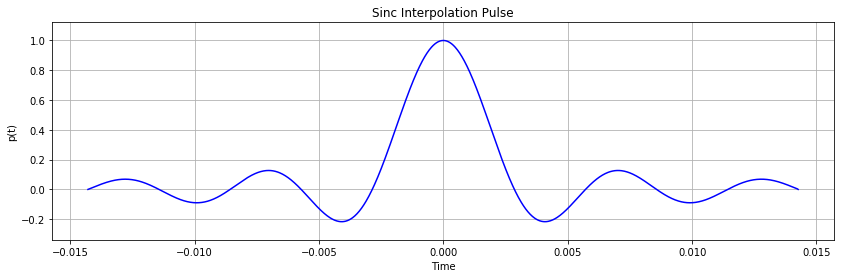

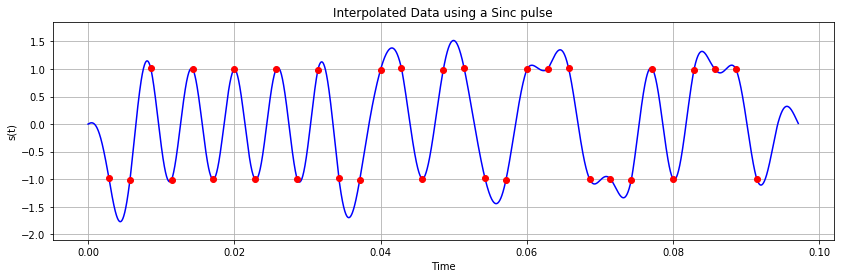

In [9]:
Fb = 350 # Baud rate (bits/sec)
Fs = 44100 # Sampling frequency (samples/sec)

string="Test"
dn = asc2bin(string,8)
dn = multiply(dn,2)-1

sig_pt = ecen.sigSequ(dn,Fb)

pam_pt = pamfun.pam12(sig_pt,Fs,'sinc',[5,0.4])

##### Part B)

For the module pamfun.py, write a Python function called pamrcvr10 (PAM receiver V1.0) which implements a receiver, with matched filter and sampler, for (noisy) PAM signals.

##### Part C)

Use showpsd in combination with trapfilt and time domain plots to analyze the PAM signals sufficiently so that you can use your pamrcvr10 function to recover the ASCII text in each case.

In [10]:
import wavfun
import ascfun

###### pamsig601.wav

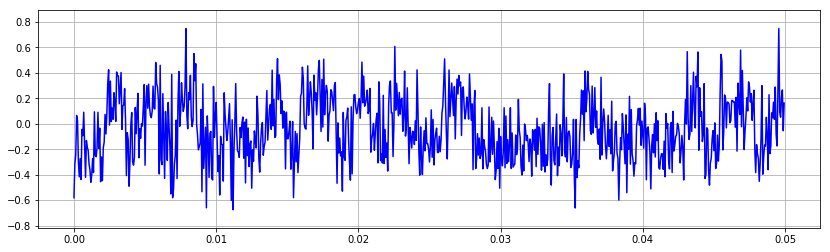

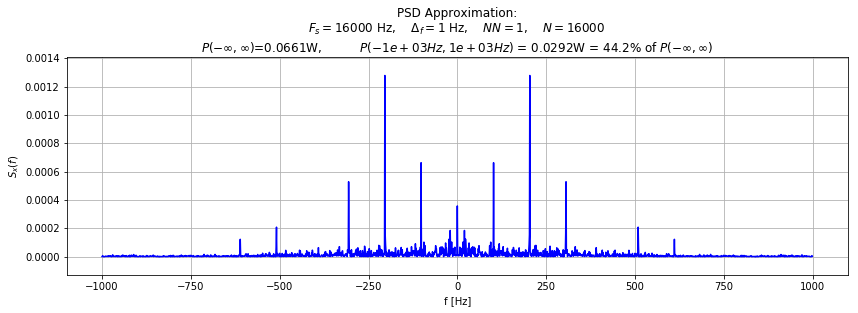

In [11]:
[seq, framerate] = wavfun.wavread("pamsig601.wav")
tt=quick.quicktt(seq,framerate)
quick.quickplot(tt[0:800],seq[0:800])

sig_xt = ecen.sigWave(seq, framerate)
showfun.showpsd1(sig_xt,[-1000, 1000, 0],framerate) #Plot S_x(f)

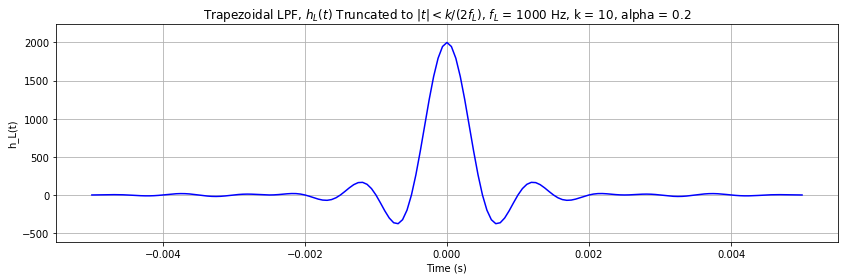

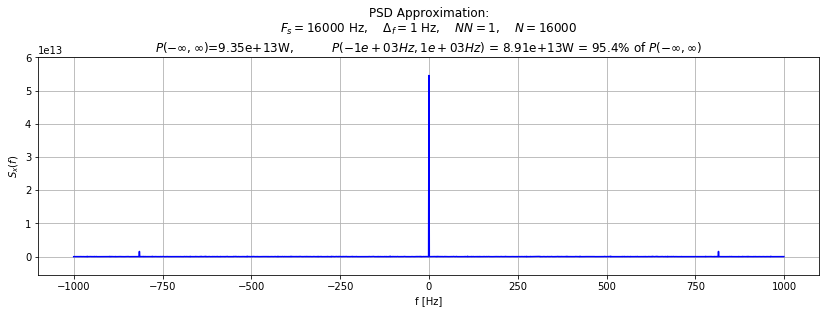

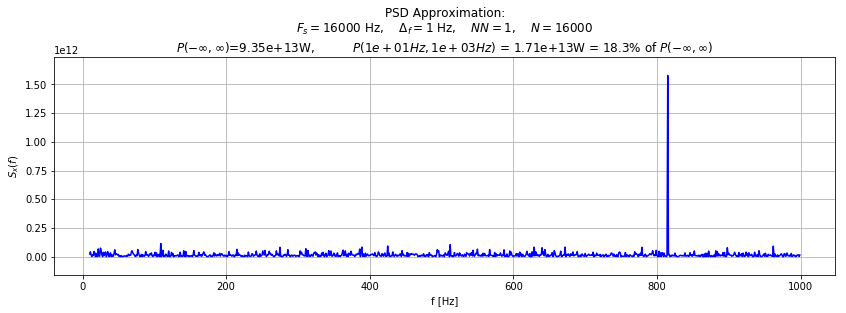

In [12]:
fL=1000
k=10
alfa=0.2
[trap_xt,n]=filtfun.trapfilt0(sig_xt,fL,k,alfa)
trap_xt_sqrd = trap_xt.copy()

trap_xt_sqrd.sig = trap_xt_sqrd.sig**2
showfun.showpsd1(trap_xt_sqrd,[-1000, 1000, 0],framerate) #Plot S_x(f)
showfun.showpsd1(trap_xt_sqrd,[10, 1000, 0],framerate) #Plot S_x(f)

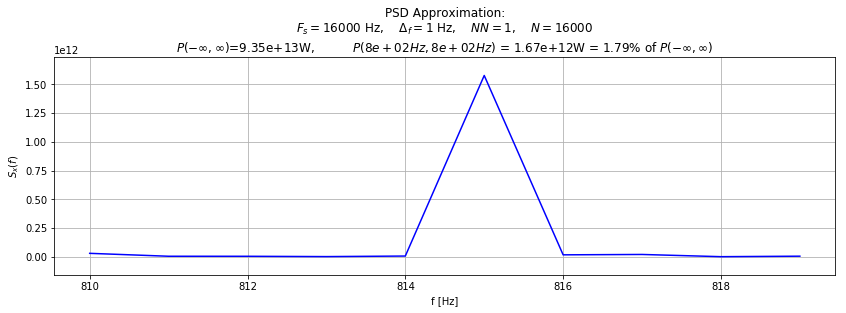

In [13]:
showfun.showpsd1(trap_xt_sqrd,[810, 820, 0],framerate) #Plot S_x(f)

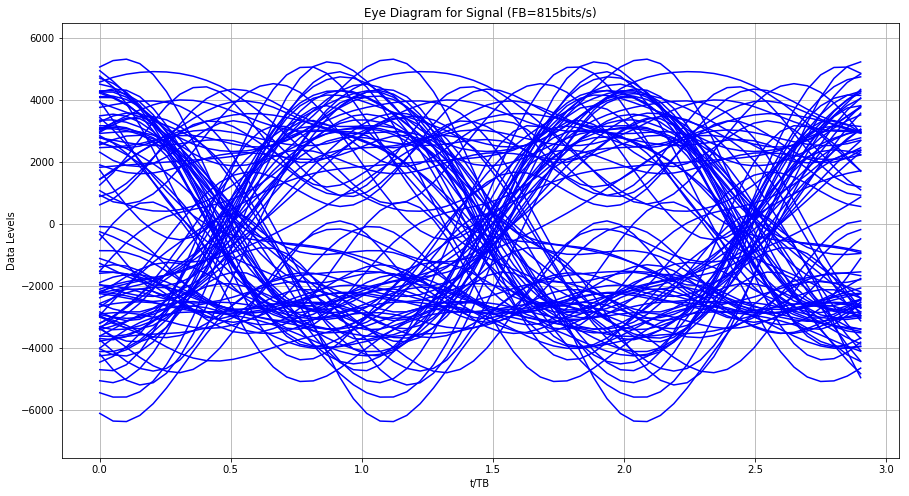

In [14]:
NTd=100
L=2
dly=0.5
FB=815
showfun.showeye(trap_xt, FB, NTd, [dly, 3, -1.5*L, 1.5*L])

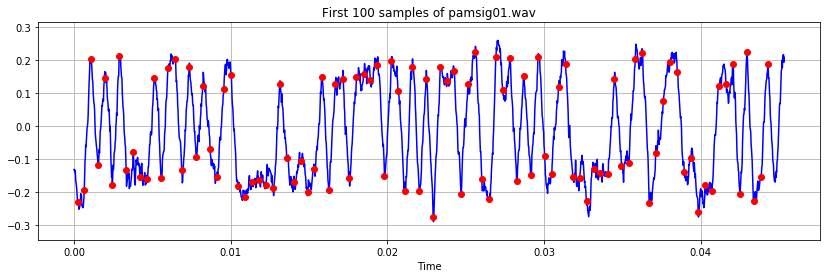

In [15]:
bn, bt, ixn = pamfun.pamrcvr10(sig_xt, [FB,0], 'rect', pparms=[3,0.5])

ttb=quick.quicktt(bt,Fs)
quick.quickplot(ttb,bt,'-b',ttb[ixn],bn,'or','pamsig01.wav','Time','',['first',100])

In [16]:
dn = []
for i in bn:
    if i>=0:
        i=1
    else:
        i=0
    dn=concatenate([dn,[i]])
[textstring, ASCIIstring]=ascfun.bin2asc(dn, 8)
print(textstring)

The house spider is there to bring good luck!
Most spiders have 8 eyes and 8 legs.
Is that why some of them "byte"?


###### pamsig602.wav

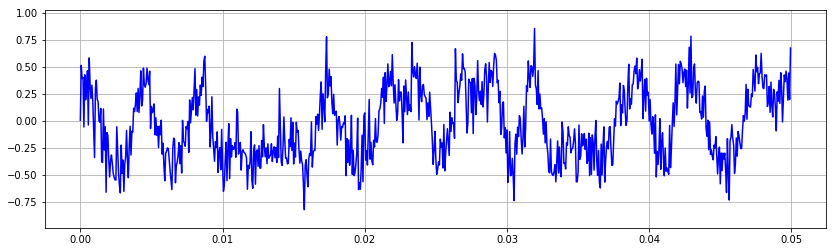

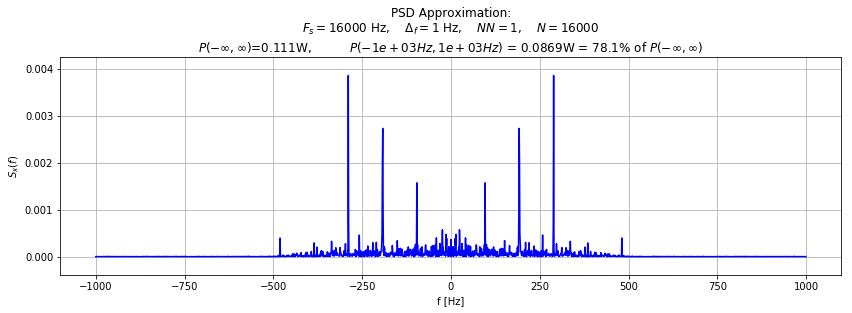

In [17]:
[seq, framerate] = wavfun.wavread("pamsig602.wav")
tt=quick.quicktt(seq,framerate)
quick.quickplot(tt[0:800],seq[0:800])

sig_xt = ecen.sigWave(seq, framerate)
showfun.showpsd1(sig_xt,[-1000, 1000, 0],framerate) #Plot S_x(f)

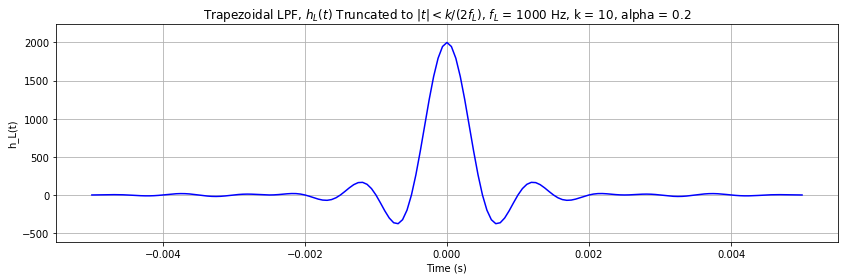

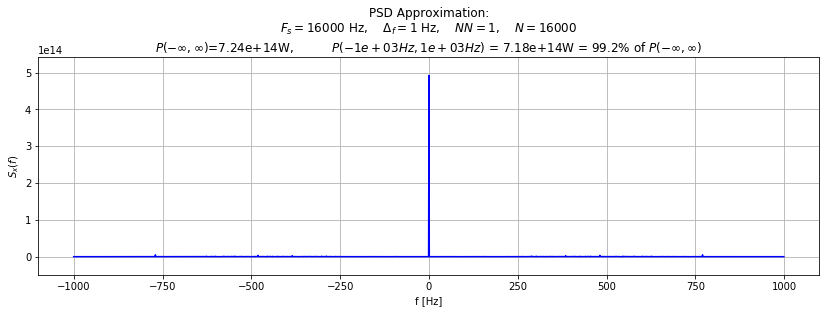

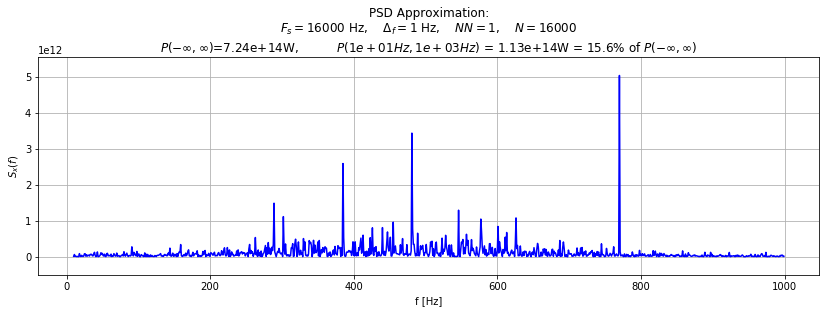

In [18]:
fL=1000
k=10
alfa=0.2
[trap_xt,n]=filtfun.trapfilt0(sig_xt,fL,k,alfa)
trap_xt_sqrd = trap_xt.copy()

trap_xt_sqrd.sig = trap_xt_sqrd.sig**2
showfun.showpsd1(trap_xt_sqrd,[-1000, 1000, 0],framerate) #Plot S_x(f)
showfun.showpsd1(trap_xt_sqrd,[10, 1000, 0],framerate) #Plot S_x(f)

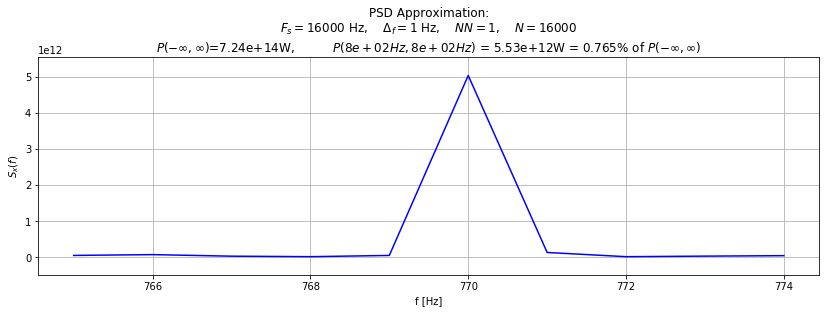

In [19]:
showfun.showpsd1(trap_xt_sqrd,[765, 775, 0],framerate) #Plot S_x(f)

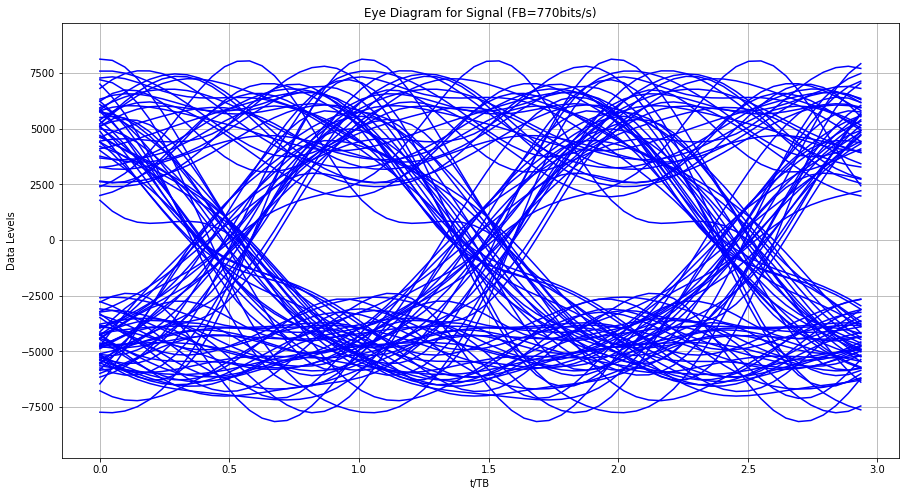

In [20]:
NTd=100
L=2
dly=0.5
FB=770
showfun.showeye(trap_xt, FB, NTd, [dly, 3, -1.5*L, 1.5*L])

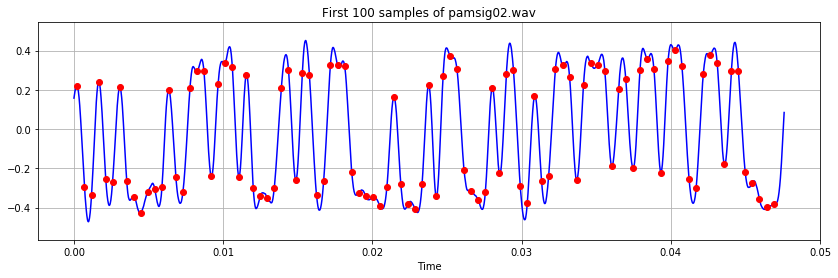

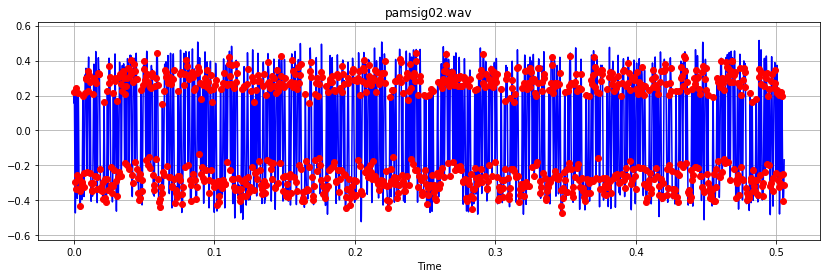

In [21]:
bn, bt, ixn = pamfun.pamrcvr10(sig_xt, [FB,0], 'rrcf', pparms=[10,0.2])

ttb=quick.quicktt(bt,Fs)
quick.quickplot(ttb,bt,'-b',ttb[ixn],bn,'or','pamsig02.wav','Time','',['first',100])
quick.quickplot(ttb,bt,'-b',ttb[ixn],bn,'or','pamsig02.wav','Time','')

In [22]:
dn = []
for i in bn:
    if i>=0:
        i=1
    else:
        i=0
    dn=concatenate([dn,[i]])
[textstring, ASCIIstring]=ascfun.bin2asc(dn, 8)
print(textstring)

I was thrown out of college for cheating on the metaphysics exam;
I looked into the soul of the boy sitting next to me. (Woody Allen)


###### pamsig603.wav

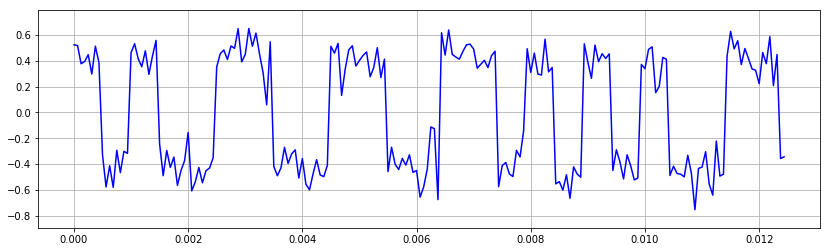

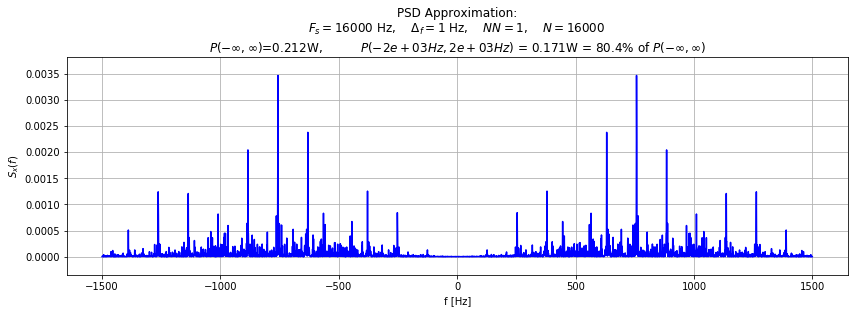

In [23]:
[seq, framerate] = wavfun.wavread("pamsig603.wav")
tt=quick.quicktt(seq,framerate)
quick.quickplot(tt[0:200],seq[0:200])

sig_xt = ecen.sigWave(seq, framerate)
showfun.showpsd1(sig_xt,[-1500, 1500, 0],framerate) #Plot S_x(f)

> There is no DC component here, so this must be a Manchester-encoded signal

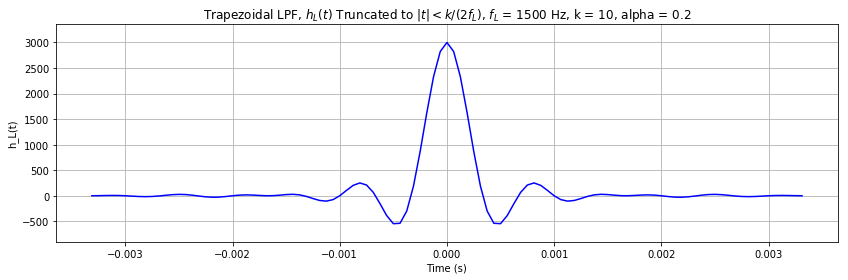

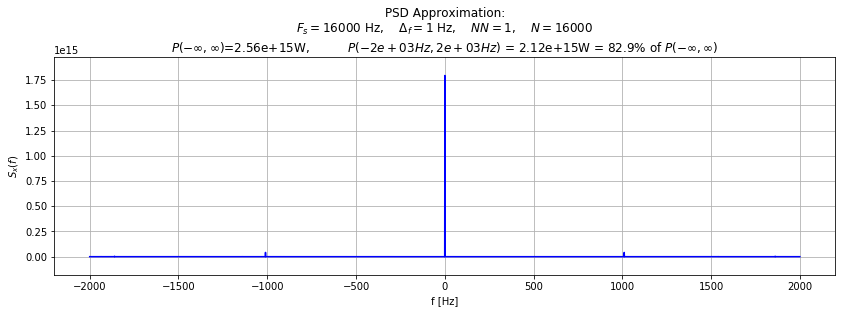

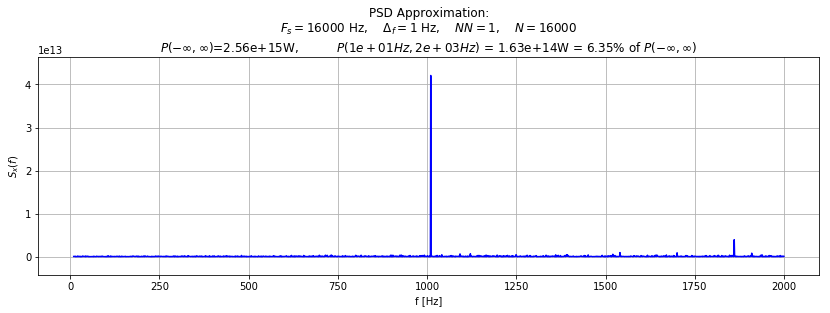

In [24]:
fL=1500
k=10
alfa=0.2
[trap_xt,n]=filtfun.trapfilt0(sig_xt,fL,k,alfa)
trap_xt_sqrd = trap_xt.copy()

trap_xt_sqrd.sig = trap_xt_sqrd.sig**2
showfun.showpsd1(trap_xt_sqrd,[-2000, 2000, 0],framerate) #Plot S_x(f)
showfun.showpsd1(trap_xt_sqrd,[10, 2000, 0],framerate) #Plot S_x(f)

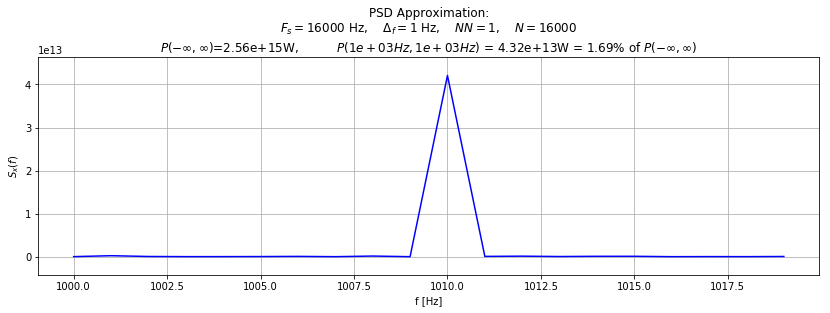

In [25]:
showfun.showpsd1(trap_xt_sqrd,[1000, 1020, 0],framerate) #Plot S_x(f)

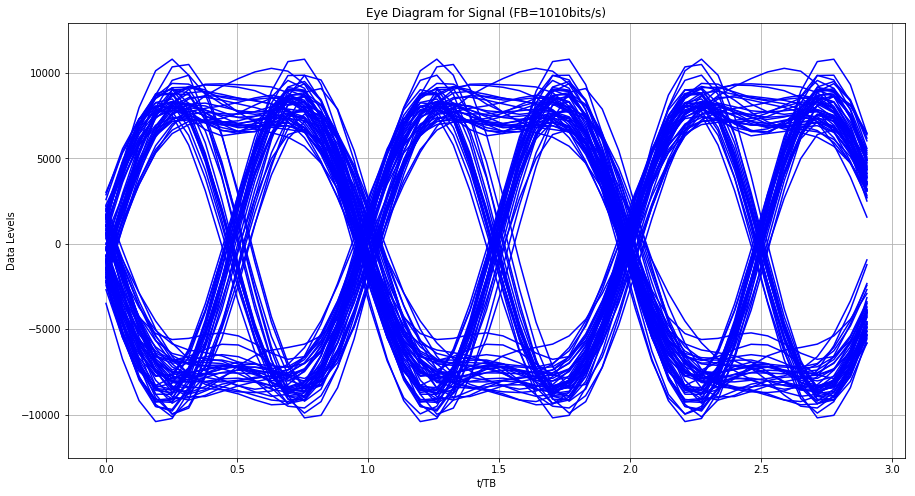

In [26]:
NTd=100
L=2
dly=0.5
FB=1010 # 1010 or 1860
showfun.showeye(trap_xt, FB, NTd, [dly, 3, -1.5*L, 1.5*L])

In [27]:
bn, bt, ixn = pamfun.pamrcvr10(sig_xt, [FB,0.1], 'man', pparms=[])

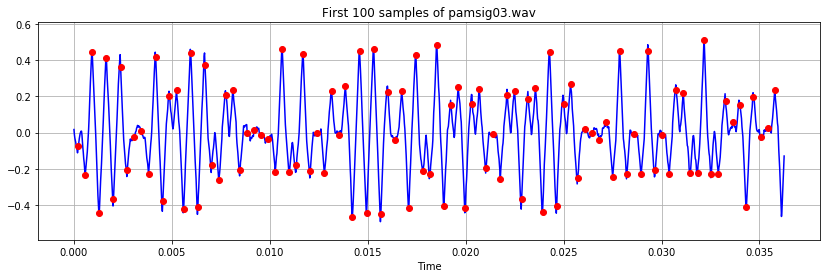

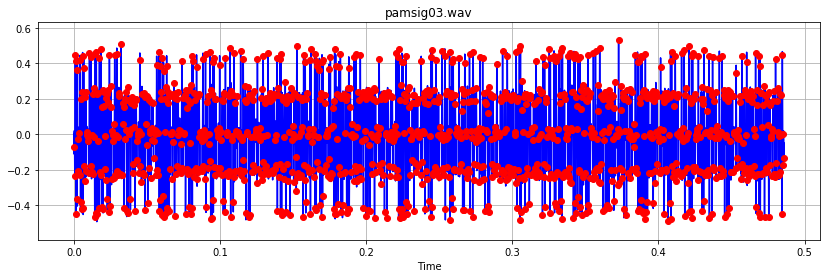

In [28]:
ttb=quick.quicktt(bt,Fs)
quick.quickplot(ttb,bt,'-b',ttb[ixn],bn,'or','pamsig03.wav','Time','',['first',100])
quick.quickplot(ttb,bt,'-b',ttb[ixn],bn,'or','pamsig03.wav','Time','')

In [29]:
dn = []
for i in bn:
    if i>=0.15:
        i=1
    else:
        i=0
    dn=concatenate([dn,[i]])
[textstring, ASCIIstring]=ascfun.bin2asc(dn, 8)
print(textstring)

The QUick bRiUj fiH jUmPS )VeR The laJI die 01234565()*
The AUick bRiUj fiH jUmPS iVeR The haJI dIe 01234%65()*
The QUIck BRiUJ diH jUmPS iVeR The lAJI die 01234565()*


> I'm so nearly there....for whatever reason I cannot get the zero-level data points to resolve to a polar binary level. However, this should be done by adjusting the delay of the signal to make level readings at the points just to the left or right of the zero crossings on the eye diagram

##### Part D)

Extend $ptfun.py$ to include $pamhRt$

In [30]:
import ptfun
import quick

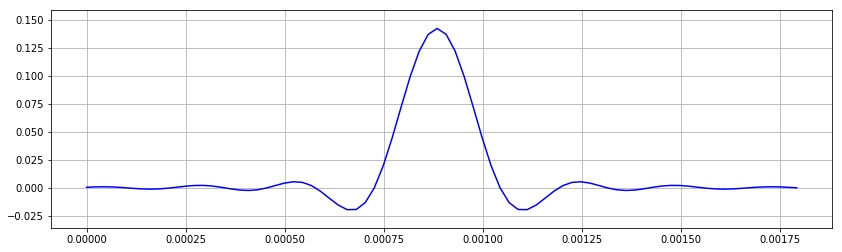

In [31]:
Fs=44100
FB=100

hrt=ptfun.pamhRt(8, 'rrcf',[5,0.5])

tthr=quick.quicktt(hrt,Fs)
quick.quickplot(tthr,hrt,'b-')

##### Part E)

Question

Using the Rectangular ptype:
> ![2e.rect1](2e_rect1.png)
>
> A noise level of An=0.9 results in occasional errors
> ![2e.rect2](2e_rect2.png)


Using the Mancherster ptype:
> ![2e.man1](2e_man1.png)
> 
> A noise level of An=0.9 results in occasional errors
> ![2e.man2](2e_man2.png)

Using the RRCf ptype:
> ![2e.rrcf1](2e_rrcf1.png)
>
> A noise level of An=0.8 results in occasional errors
> ![2e.rrcf2](2e_rrcf2.png)

> The permissable An level is nearly the same for all of the ptypes. The RRCf ptype does produce a slightly higher An, but none of the ptypse should matter for this signal

##### Part F)

Build the GRC flowgraph which includes the Polyphase Clock Sync

> ![2f.rrcf](2f_rrcf.png)
>
> The results using the Polyuphase clock improve the process's resistance to noise but 0.2An (the message is readable up to about 1An). However, as seen by the following figure, the Polyphase clock breaksdown for the rect and man ptypes, since the polyphase clock is not constructed f

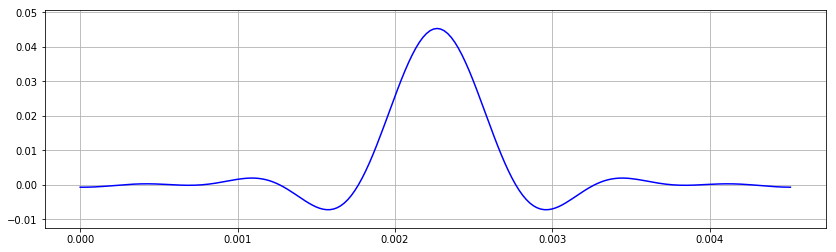

In [32]:
hrt=filtspecs.trapfilt_taps(200,1000/44100.0,0.3)
tt=quick.quicktt(hrt,44100.0)
quick.quickplot(tt,hrt)